## Mark-1 MRI Reconstruction using Basic Autoencoder

In [1]:
import torch as pt
import h5py as hf
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.image as img

#### Dataset Description :

No: of Training Samples : 30

No: of Testing Samples : 10

Image Dimensions : 192x192

In [2]:
train_path = 'D:/MRIdata/train/'
test_path = 'D:/MRIdata/test/'

train_filenames = os.listdir(train_path)
train_files = []

for filename in train_filenames :
    sample = img.imread(train_path+filename,'r')
    train_files.append(sample)
    
test_filenames = os.listdir(test_path)
test_files = []

for filename in test_filenames :
    sample = img.imread(test_path+filename,'r')
    test_files.append(sample)

In [3]:
np.shape(train_files)

(30, 192, 192)

In [4]:
np.shape(test_files)

(10, 192, 192)

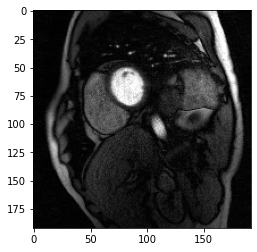

In [5]:
plt.imshow(train_files[4],cmap = 'gray')

#### Reshaping the dataset for the Neural Network :

In [6]:
train = np.array(train_files)
test =  np.array(test_files)
train = train.reshape((30,192,192,1))
test = test.reshape((10,192,192,1))

In [7]:
train.shape

(30, 192, 192, 1)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
datagen = ImageDataGenerator()
datagen.fit(train)


#### Masking (UnderSampling):

Here, each training sample is multiplied with a binary mask which undersamples the input to 25%.
The masking matrix has 25% of its elements 1 and other zeroes. It is then multiplied with each training image.

In [10]:
def rand_bin_array(K, N):
    arr = np.zeros(N*N)
    k = int(K*N*N)
    arr[:k]  = 1
    np.random.shuffle(arr)
    return arr.reshape((N,N))

In [11]:
train_y = train.copy()
for i in range(len(train)) :
    train[i] = np.dot(train[i].reshape(192,192),rand_bin_array(0.25,192)).reshape(192,192,1)
    

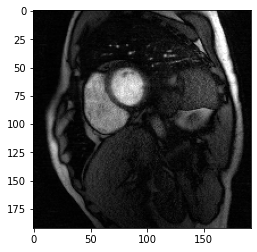

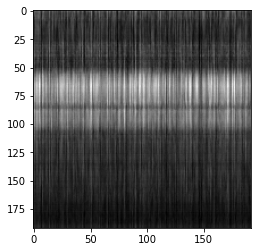

In [12]:
plt.imshow(train_y[1].reshape(192,192),cmap = 'gray')
plt.show()
plt.imshow(train[1].reshape(192,192),cmap = 'gray')
plt.show()


# Model : Basic AutoEncoder

The model is trained on the undersampled images and forced to recreate the original image. Thus undersamples images are  the input and the original images are the target variable

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [14]:
encoder = Sequential()
encoder.add(Flatten(input_shape=(192,192,1)))
encoder.add(Dense(800,activation="relu"))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))

In [15]:
decoder = Sequential()
decoder.add(Dense(100,input_shape=[50],activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(800,activation='relu'))
decoder.add(Dense(192 * 192, activation="sigmoid"))
decoder.add(Reshape([192, 192]))

In [16]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['mse'])

In [17]:
autoencoder.fit(datagen.flow(train,train_y,batch_size=32, shuffle=True, sample_weight=None, seed=None,
    save_to_dir='D:/MRIdata/aug/', save_prefix='', save_format='png', subset=None)
, epochs=350,validation_data=[test,test])

  ...
    to  
  ['...']
Train for 1 steps, validate on 10 samples
Epoch 1/350
1/1 [==============================] - 32s 32s/step - loss: 0.6941 - mse: 0.1623 - val_loss: 0.6931 - val_mse: 0.1524
Epoch 2/350
1/1 [==============================] - 1s 643ms/step - loss: 0.6935 - mse: 0.1620 - val_loss: 0.6931 - val_mse: 0.1524
Epoch 3/350
1/1 [==============================] - 0s 241ms/step - loss: 0.6927 - mse: 0.1616 - val_loss: 0.6931 - val_mse: 0.1524
Epoch 4/350
1/1 [==============================] - 0s 201ms/step - loss: 0.6921 - mse: 0.1613 - val_loss: 0.6931 - val_mse: 0.1524
Epoch 5/350
1/1 [==============================] - 0s 208ms/step - loss: 0.6913 - mse: 0.1609 - val_loss: 0.6930 - val_mse: 0.1524
Epoch 6/350
1/1 [==============================] - 1s 1s/step - loss: 0.6897 - mse: 0.1601 - val_loss: 0.6929 - val_mse: 0.1523
Epoch 7/350
1/1 [==============================] - 5s 5s/step - loss: 0.6869 - mse: 0.1587 - val_loss: 0.6927 - val_mse: 0.1522
Epoch 8/350
1/1 [======

Epoch 63/350
1/1 [==============================] - 0s 210ms/step - loss: 0.6913 - mse: 0.1609 - val_loss: 0.6913 - val_mse: 0.1515
Epoch 64/350
1/1 [==============================] - 0s 231ms/step - loss: 0.6913 - mse: 0.1609 - val_loss: 0.6913 - val_mse: 0.1515
Epoch 65/350
1/1 [==============================] - 0s 200ms/step - loss: 0.6912 - mse: 0.1608 - val_loss: 0.6912 - val_mse: 0.1515
Epoch 66/350
1/1 [==============================] - 0s 197ms/step - loss: 0.6911 - mse: 0.1608 - val_loss: 0.6912 - val_mse: 0.1514
Epoch 67/350
1/1 [==============================] - 0s 205ms/step - loss: 0.6911 - mse: 0.1608 - val_loss: 0.6911 - val_mse: 0.1514
Epoch 68/350
1/1 [==============================] - 0s 199ms/step - loss: 0.6910 - mse: 0.1608 - val_loss: 0.6911 - val_mse: 0.1514
Epoch 69/350
1/1 [==============================] - 0s 244ms/step - loss: 0.6910 - mse: 0.1607 - val_loss: 0.6910 - val_mse: 0.1513
Epoch 70/350
1/1 [==============================] - 0s 227ms/step - loss: 0.

Epoch 125/350
1/1 [==============================] - 0s 213ms/step - loss: 0.6872 - mse: 0.1589 - val_loss: 0.6873 - val_mse: 0.1495
Epoch 126/350
1/1 [==============================] - 0s 198ms/step - loss: 0.6872 - mse: 0.1588 - val_loss: 0.6872 - val_mse: 0.1495
Epoch 127/350
1/1 [==============================] - 0s 198ms/step - loss: 0.6871 - mse: 0.1588 - val_loss: 0.6871 - val_mse: 0.1494
Epoch 128/350
1/1 [==============================] - 0s 218ms/step - loss: 0.6870 - mse: 0.1587 - val_loss: 0.6871 - val_mse: 0.1494
Epoch 129/350
1/1 [==============================] - 0s 280ms/step - loss: 0.6869 - mse: 0.1587 - val_loss: 0.6870 - val_mse: 0.1493
Epoch 130/350
1/1 [==============================] - 0s 201ms/step - loss: 0.6868 - mse: 0.1586 - val_loss: 0.6869 - val_mse: 0.1493
Epoch 131/350
1/1 [==============================] - 0s 192ms/step - loss: 0.6867 - mse: 0.1586 - val_loss: 0.6868 - val_mse: 0.1492
Epoch 132/350
1/1 [==============================] - 0s 187ms/step - 

Epoch 187/350
1/1 [==============================] - 0s 199ms/step - loss: 0.6773 - mse: 0.1539 - val_loss: 0.6775 - val_mse: 0.1446
Epoch 188/350
1/1 [==============================] - 0s 194ms/step - loss: 0.6770 - mse: 0.1538 - val_loss: 0.6772 - val_mse: 0.1444
Epoch 189/350
1/1 [==============================] - 0s 203ms/step - loss: 0.6767 - mse: 0.1536 - val_loss: 0.6768 - val_mse: 0.1443
Epoch 190/350
1/1 [==============================] - 0s 207ms/step - loss: 0.6763 - mse: 0.1534 - val_loss: 0.6765 - val_mse: 0.1441
Epoch 191/350
1/1 [==============================] - 0s 205ms/step - loss: 0.6760 - mse: 0.1532 - val_loss: 0.6762 - val_mse: 0.1439
Epoch 192/350
1/1 [==============================] - 0s 198ms/step - loss: 0.6756 - mse: 0.1531 - val_loss: 0.6758 - val_mse: 0.1437
Epoch 193/350
1/1 [==============================] - 0s 218ms/step - loss: 0.6753 - mse: 0.1529 - val_loss: 0.6754 - val_mse: 0.1436
Epoch 194/350
1/1 [==============================] - 0s 417ms/step - 

Epoch 249/350
1/1 [==============================] - 0s 190ms/step - loss: 0.4264 - mse: 0.0395 - val_loss: 0.4236 - val_mse: 0.0300
Epoch 250/350
1/1 [==============================] - 0s 186ms/step - loss: 0.4060 - mse: 0.0324 - val_loss: 0.4078 - val_mse: 0.0248
Epoch 251/350
1/1 [==============================] - 0s 216ms/step - loss: 0.3893 - mse: 0.0271 - val_loss: 0.3956 - val_mse: 0.0211
Epoch 252/350
1/1 [==============================] - 0s 203ms/step - loss: 0.3768 - mse: 0.0234 - val_loss: 0.3866 - val_mse: 0.0185
Epoch 253/350
1/1 [==============================] - 0s 499ms/step - loss: 0.3677 - mse: 0.0208 - val_loss: 0.3796 - val_mse: 0.0165
Epoch 254/350
1/1 [==============================] - 0s 204ms/step - loss: 0.3606 - mse: 0.0189 - val_loss: 0.3739 - val_mse: 0.0149
Epoch 255/350
1/1 [==============================] - 0s 212ms/step - loss: 0.3548 - mse: 0.0173 - val_loss: 0.3690 - val_mse: 0.0136
Epoch 256/350
1/1 [==============================] - 0s 215ms/step - 

Epoch 311/350
1/1 [==============================] - 1s 524ms/step - loss: 0.3091 - mse: 0.0055 - val_loss: 0.3282 - val_mse: 0.0033
Epoch 312/350
1/1 [==============================] - 0s 191ms/step - loss: 0.3091 - mse: 0.0054 - val_loss: 0.3282 - val_mse: 0.0033
Epoch 313/350
1/1 [==============================] - 0s 195ms/step - loss: 0.3091 - mse: 0.0054 - val_loss: 0.3281 - val_mse: 0.0033
Epoch 314/350
1/1 [==============================] - 0s 397ms/step - loss: 0.3091 - mse: 0.0054 - val_loss: 0.3281 - val_mse: 0.0033
Epoch 315/350
1/1 [==============================] - 0s 206ms/step - loss: 0.3090 - mse: 0.0054 - val_loss: 0.3280 - val_mse: 0.0033
Epoch 316/350
1/1 [==============================] - 0s 194ms/step - loss: 0.3090 - mse: 0.0054 - val_loss: 0.3280 - val_mse: 0.0033
Epoch 317/350
1/1 [==============================] - 0s 200ms/step - loss: 0.3090 - mse: 0.0054 - val_loss: 0.3280 - val_mse: 0.0032
Epoch 318/350
1/1 [==============================] - 0s 202ms/step - 

<AxesSubplot:>

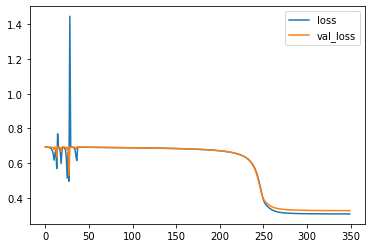

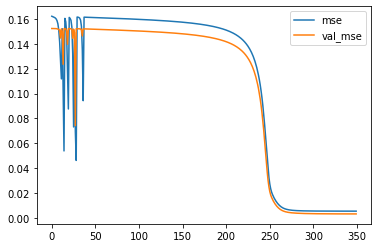

In [18]:
import pandas as pd
stats  = pd.DataFrame(autoencoder.history.history)
stats[['loss','val_loss']].plot()
stats[['mse','val_mse']].plot()

#### Testing out the Reconstruction

In [19]:
sample= train[:4]
pred = autoencoder.predict(sample)

In [20]:

'''f,axes = plt.subplots(1,3)
axes[0].imshow(train_y[2],cmap = 'gray')
axes[1].imshow(train[2],cmap = 'gray')
axes[2].imshow(pred[2],cmap = 'gray')'''


"f,axes = plt.subplots(1,3)\naxes[0].imshow(train_y[2],cmap = 'gray')\naxes[1].imshow(train[2],cmap = 'gray')\naxes[2].imshow(pred[2],cmap = 'gray')"

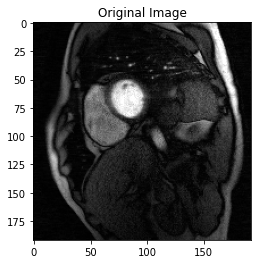

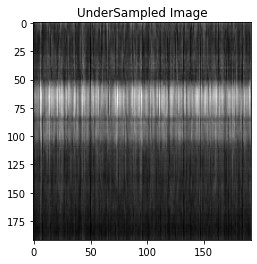

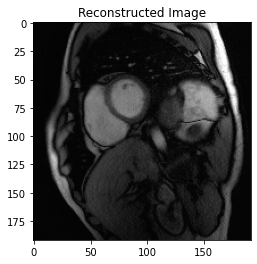

In [21]:
plt.imshow(train_y[2],cmap = 'gray')
plt.title('Original Image')
plt.show()

plt.imshow(train[2],cmap = 'gray')
plt.title('UnderSampled Image')
plt.show()

plt.imshow(pred[2],cmap = 'gray')
plt.title('Reconstructed Image')
plt.show()

In [ ]:
from sklearn.metrics import 